In [1]:
from torchinfo import summary

from notus import FileDataset, Tokenizer, build_transformer, AttentionVisualizer
from torch.utils.data import DataLoader

In [2]:
tokenizer = Tokenizer()

In [3]:
tokenizer.load_vocab_and_merges('../notus/tokenizer/vocab.json', '../notus/tokenizer/merges.txt')

In [4]:
dataset = FileDataset("/Users/daniilogorodnikov/dataset/test/", 2048, tokenizer)

100%|██████████| 9/9 [00:06<00:00,  1.32it/s]


In [5]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, pin_memory=True)

In [6]:
x =next(iter(dataloader))

/Users/daniilogorodnikov/PycharmProjects/Notus/.venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [7]:
import torch

In [8]:
torch.set_printoptions(threshold=2050)

In [9]:
len(tokenizer.vocab)

6542

In [10]:
origin_ids = x['origin_ids']
masked_ids = x['masked_ids']
attention_mask_masked_ids = x['attention_mask_masked_ids']
removed_elements = x['removed_elements']
attention_mask_removed_elements = x['attention_mask_removed_elements']

In [11]:
chps = torch.load("weights/best_model_localattention_20250628_122901.pt", weights_only=False, map_location=torch.device('cpu'))

In [22]:
transformer_correction = build_transformer(vocab_size=6542,
                                d_model=1024,
                                max_seq_len=2048,
                                d_ff=1024,
                                dropout=0.1,
                                n_layers=4,
                                n_heads=4,
                                factor=1,
                                compress=False,
                                winsize=64,
                                return_attention=True,)

correction_data = build_transformer(vocab_size=6542,
                                d_model=32,
                                max_seq_len=2048,
                                d_ff=32,
                                dropout=0.1,
                                n_layers=4,
                                n_heads=4,
                                factor=128,
                                compress=True,
                                winsize=32,
                                return_attention=True)

Зарегистрирован хук для: encoder.layers.0.self_attention_block
Зарегистрирован хук для: encoder.layers.1.self_attention_block
Зарегистрирован хук для: encoder.layers.2.self_attention_block
Зарегистрирован хук для: encoder.layers.3.self_attention_block
Зарегистрирован хук для: decoder.layers.0.self_attention_block
Зарегистрирован хук для: decoder.layers.0.cross_attention_block
Зарегистрирован хук для: decoder.layers.1.self_attention_block
Зарегистрирован хук для: decoder.layers.1.cross_attention_block
Зарегистрирован хук для: decoder.layers.2.self_attention_block
Зарегистрирован хук для: decoder.layers.2.cross_attention_block
Зарегистрирован хук для: decoder.layers.3.self_attention_block
Зарегистрирован хук для: decoder.layers.3.cross_attention_block
Зарегистрирован хук для: encoder.layers.0.self_attention_block
Зарегистрирован хук для: encoder.layers.1.self_attention_block
Зарегистрирован хук для: encoder.layers.2.self_attention_block
Зарегистрирован хук для: encoder.layers.3.self_atte

In [23]:
transformer_correction.load_state_dict(chps['transformer_correction'])
correction_data.load_state_dict(chps['correction_data'])

<All keys matched successfully>

In [14]:
from torchinfo import summary

In [15]:
summary(transformer_correction, input_data=(torch.zeros(1, 2048, dtype=torch.int32),torch.zeros(1, 2048, dtype=torch.float32)))

Хук сработал для: LocalAttentionBlock(
  (w_q): Linear(in_features=1024, out_features=1024, bias=False)
  (w_k): Linear(in_features=1024, out_features=1024, bias=False)
  (w_v): Linear(in_features=1024, out_features=1024, bias=False)
  (w_o): Linear(in_features=1024, out_features=1024, bias=False)
  (dropout): Dropout(p=0.1, inplace=False)
), weights found: True
Хук сработал для: LocalAttentionBlock(
  (w_q): Linear(in_features=1024, out_features=1024, bias=False)
  (w_k): Linear(in_features=1024, out_features=1024, bias=False)
  (w_v): Linear(in_features=1024, out_features=1024, bias=False)
  (w_o): Linear(in_features=1024, out_features=1024, bias=False)
  (dropout): Dropout(p=0.1, inplace=False)
), weights found: True
Хук сработал для: LocalAttentionBlock(
  (w_q): Linear(in_features=1024, out_features=1024, bias=False)
  (w_k): Linear(in_features=1024, out_features=1024, bias=False)
  (w_v): Linear(in_features=1024, out_features=1024, bias=False)
  (w_o): Linear(in_features=1024, ou

Layer (type:depth-idx)                                  Output Shape              Param #
Transformer                                             [1, 2048, 6542]           --
├─InputEmbeddings: 1-1                                  [1, 2048, 1024]           --
│    └─Embedding: 2-1                                   [1, 2048, 1024]           6,699,008
├─PositionalEncoding: 1-2                               [1, 2048, 1024]           --
│    └─Dropout: 2-2                                     [1, 2048, 1024]           --
├─Encoder: 1-3                                          [1, 2048, 1024]           --
│    └─ModuleList: 2-3                                  --                        --
│    │    └─EncoderBlock: 3-1                           [1, 2048, 1024]           6,297,600
│    │    └─EncoderBlock: 3-2                           [1, 2048, 1024]           6,297,600
│    │    └─EncoderBlock: 3-3                           [1, 2048, 1024]           6,297,600
│    │    └─EncoderBlock: 3-4   

In [24]:
visualizer = AttentionVisualizer()
visualizer.register_hooks(correction_data)

Зарегистрирован хук для: encoder.layers.0.self_attention_block
Зарегистрирован хук для: encoder.layers.1.self_attention_block
Зарегистрирован хук для: encoder.layers.2.self_attention_block
Зарегистрирован хук для: encoder.layers.3.self_attention_block
Зарегистрирован хук для: decoder.layers.0.self_attention_block
Зарегистрирован хук для: decoder.layers.0.cross_attention_block
Зарегистрирован хук для: decoder.layers.1.self_attention_block
Зарегистрирован хук для: decoder.layers.1.cross_attention_block
Зарегистрирован хук для: decoder.layers.2.self_attention_block
Зарегистрирован хук для: decoder.layers.2.cross_attention_block
Зарегистрирован хук для: decoder.layers.3.self_attention_block
Зарегистрирован хук для: decoder.layers.3.cross_attention_block


In [25]:
visualizer = correction_data.attention_visualizer

In [26]:
with torch.no_grad():
    correction_dataaa = correction_data(origin_ids, attention_mask_masked_ids)


Хук сработал для: LocalAttentionBlock(
  (w_q): Linear(in_features=32, out_features=32, bias=False)
  (w_k): Linear(in_features=32, out_features=32, bias=False)
  (w_v): Linear(in_features=32, out_features=32, bias=False)
  (w_o): Linear(in_features=32, out_features=32, bias=False)
  (dropout): Dropout(p=0.1, inplace=False)
), weights found: True
Хук сработал для: LocalAttentionBlock(
  (w_q): Linear(in_features=32, out_features=32, bias=False)
  (w_k): Linear(in_features=32, out_features=32, bias=False)
  (w_v): Linear(in_features=32, out_features=32, bias=False)
  (w_o): Linear(in_features=32, out_features=32, bias=False)
  (dropout): Dropout(p=0.1, inplace=False)
), weights found: True
Хук сработал для: LocalAttentionBlock(
  (w_q): Linear(in_features=32, out_features=32, bias=False)
  (w_k): Linear(in_features=32, out_features=32, bias=False)
  (w_v): Linear(in_features=32, out_features=32, bias=False)
  (w_o): Linear(in_features=32, out_features=32, bias=False)
  (dropout): Dropou

Форма весов внимания для decoder.layers.0.self_attention_block: torch.Size([2, 4, 2048, 2048])


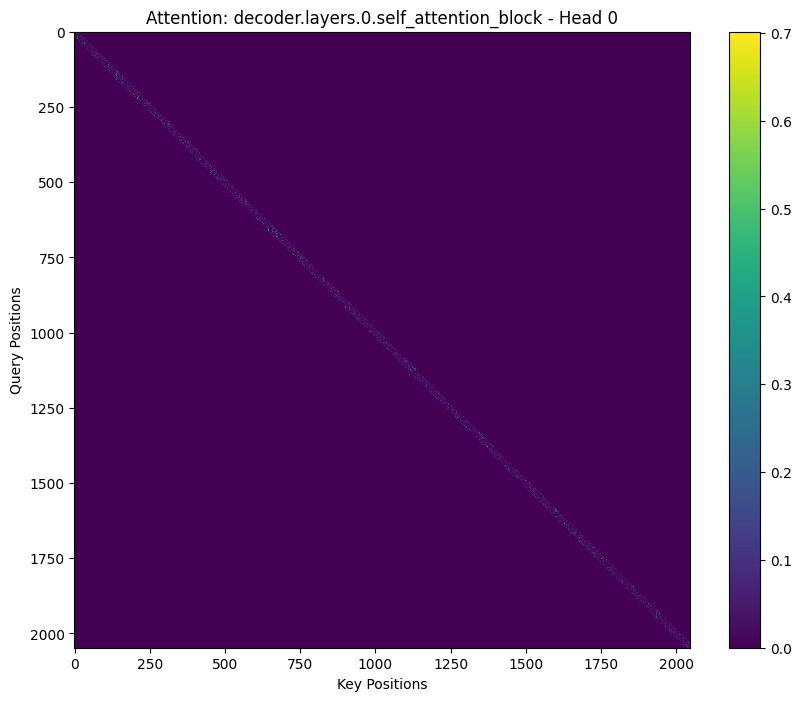

In [27]:
visualizer.visualize("decoder.layers.0.self_attention_block", head=0)